This notebook downloads health data at county level from County Health Rankings website and is composed of the following sections:

1.	Dataset download in user’s downloads folder for years 2015 – 2020.

2.	Functions that read the dataset automatically from user’s downloads folder for the specified tabs and columns.

3.	Dataset cleaning

4.	Imputation via KNN and MICE algorithms.

5.	Outlier detection.

In [1]:
import urllib
import requests,getpass
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 492)

<b> 1. Download all the datasets from health rankings website </b>

In [2]:
year_list_1 = ['2015','2016']


for i in year_list_1:
        url = "https://www.countyhealthrankings.org/sites/default/files/{0}%20County%20Health%20Rankings%20Data%20-%20v3.xls".format(str(i))
        myusername = getpass.getuser()
 
        resp = requests.get(url)
        with open('/Users/'+str(myusername)+'/Downloads/'+str(i)+'.csv', 'wb') as output:

            output.write(resp.content)
        output.close()

In [3]:
#2017
url = "https://www.countyhealthrankings.org/sites/default/files/2017CountyHealthRankingsData.xls"
myusername = getpass.getuser()
 
resp = requests.get(url)
with open('/Users/'+str(myusername)+'/Downloads/2017.csv', 'wb') as output:

    output.write(resp.content)
output.close()

#2018
url = "https://www.countyhealthrankings.org/sites/default/files/2018%20County%20Health%20Rankings%20Data%20-%20v2.xls"
myusername = getpass.getuser()
 
resp = requests.get(url)
with open('/Users/'+str(myusername)+'/Downloads/2018.csv', 'wb') as output:

    output.write(resp.content)
output.close()
    
    
#2019    
url = "https://www.countyhealthrankings.org/sites/default/files/media/document/2019%20County%20Health%20Rankings%20Data%20-%20v3.xls"
myusername = getpass.getuser()
 
resp = requests.get(url)
with open('/Users/'+str(myusername)+'/Downloads/2019.csv', 'wb') as output:

    output.write(resp.content)
output.close()


#2020
url = "https://www.countyhealthrankings.org/sites/default/files/media/document/2020%20County%20Health%20Rankings%20Data%20-%20v2.xlsx"
myusername = getpass.getuser()
 
resp = requests.get(url)
with open('/Users/'+str(myusername)+'/Downloads/2020.csv', 'wb') as output:

    output.write(resp.content)
output.close()

<b> 2. Functions that read the datasets automatically for the specified tabs and columns </b>

In [4]:
def Ranked_Measure_Data(year):
    
            locals()['df_Ranked_Measure_Data_'+ str(year)] = pd.DataFrame()
            locals()['df_Ranked_Measure_Data_'+ str(year)] = pd.read_excel('/Users/'+str(myusername)+'/Downloads/'+ str(year) + '.csv'
                                                                          , 'Ranked Measure Data' ,skiprows=1 )
            
            #read the file to grab real column names
            
            Real_col_names  = pd.read_excel('/Users/'+str(myusername)+'/Downloads/' + str(year) + '.csv'
                                                                , 'Ranked Measure Data' , skiprows=1).columns.tolist()
            
            #convert column names to a list and to lower case 
            
            Col_names_transf = [x.lower() for x in locals()['df_Ranked_Measure_Data_'+ str(year)].columns.to_list() ]
            
            
            
            locals()['df_Ranked_Measure_Data_'+ str(year)].rename(columns= dict(zip(Real_col_names,Col_names_transf )) , inplace=True)
            keep_col_lst = [ 
'FIPS'
,'State'
,'County'
,'Population'
,'Income Ratio'
,'% Physically Inactive'
,'Physical Inactivity'
,'Household Income'
,'Average Number of Physically Unhealthy Days'
,'Average Number of Mentally Unhealthy Days'
,'% Adults with Obesity'
,'Total deaths'
,'Deaths'
,'Physically Unhealthy Days'
,'Mentally Unhealthy Days'
,'% Obese' 
,'Median Household Income'
,'Teen Birth Rate'
,'No of Medicare enrollees'
,'% unemployed'
,'% Single-Parent Households'
,'Violent Crimes'
,'# Medicare enrollees'
,'% Unemployed'
,'# Some College'
,'Annual Violent Crimes'
,'Food Environment Index'
,'# Deaths'
,'# Violent Crimes'
,'% Insufficient Sleep']
            
            keep_col_lst_transf = [x.lower() for x in keep_col_lst ]
            locals()['df_Ranked_Measure_Data_'+ str(year)] = locals()['df_Ranked_Measure_Data_'+ str(year)][locals()['df_Ranked_Measure_Data_'+ str(year)].columns.intersection(keep_col_lst_transf)]
                                                                                                                                                 
            locals()['df_Ranked_Measure_Data_'+ str(year)]['year'] = str(year)
            return  locals()['df_Ranked_Measure_Data_'+ str(year)]

In [5]:
def Additional_Measure_Data(year):
    
            locals()['df_Additional_Measure_Data_'+ str(year)] = pd.DataFrame()
            locals()['df_Additional_Measure_Data_'+ str(year)] = pd.read_excel('/Users/'+str(myusername)+'/Downloads/'+ str(year) + '.csv'
                                                                          , 'Additional Measure Data' ,skiprows=1 )
            
            #read the file to grab real column names
            
            Real_col_names  = pd.read_excel('/Users/'+str(myusername)+'/Downloads/' + str(year) + '.csv'
                                                                , 'Additional Measure Data' , skiprows=1).columns.tolist()
            
            #convert column names to a list and to lower case 
            
            Col_names_transf = [x.lower() for x in locals()['df_Additional_Measure_Data_'+ str(year)].columns.to_list() ]
            
            
            
            locals()['df_Additional_Measure_Data_'+ str(year)].rename(columns= dict(zip(Real_col_names,Col_names_transf )) , inplace=True)
            keep_col_lst = [ 
'FIPS'
,'State'
,'County'
,'Population'
,'Income Ratio'
,'% Physically Inactive'
,'Physical Inactivity'
,'Household Income'
,'Average Number of Physically Unhealthy Days'
,'Average Number of Mentally Unhealthy Days'
,'% Adults with Obesity'
,'Total deaths'
,'Deaths'
,'Physically Unhealthy Days'
,'Mentally Unhealthy Days'
,'% Obese' 
,'Median Household Income'
,'Teen Birth Rate'
,'No of Medicare enrollees'
,'% unemployed'
,'% Single-Parent Households'
,'Violent Crimes'
,'# Medicare enrollees'
,'% Unemployed'
,'# Some College'
,'Annual Violent Crimes'
,'Food Environment Index'
,'# Deaths'
,'# Violent Crimes'
,'% Insufficient Sleep']
            
            keep_col_lst_transf = [x.lower() for x in keep_col_lst ]
            locals()['df_Additional_Measure_Data_'+ str(year)] = locals()['df_Additional_Measure_Data_'+ str(year)][locals()['df_Additional_Measure_Data_'+ str(year)].columns.intersection(keep_col_lst_transf)]
                                                                                                                                                 
            locals()['df_Additional_Measure_Data_'+ str(year)]['year'] = str(year)
            return  locals()['df_Additional_Measure_Data_'+ str(year)]

<b> 3. Read and clean the datasets </b> 

In [58]:
iter_Years = [2015,2016,2017,2018,2019,2020 ]

df_Ranked_Measure_Data_final = pd.DataFrame()
for i in iter_Years:
     df_Ranked_Measure_Data_final = pd.concat([df_Ranked_Measure_Data_final, Ranked_Measure_Data(i).loc[:, ~Ranked_Measure_Data(i).columns.duplicated()]]).fillna( np.nan)



df_Additional_Measure_Data_final = pd.DataFrame()

for i in iter_Years:
     df_Additional_Measure_Data_final = pd.concat([df_Additional_Measure_Data_final, Additional_Measure_Data(i).loc[:, ~Additional_Measure_Data(i).columns.duplicated()]]).fillna( np.nan)

In [60]:
df_Ranked_Measure_Data_final

,fips,state,county,# deaths,physically unhealthy days,mentally unhealthy days,% obese,food environment index,% physically inactive,teen birth rate,# medicare enrollees,# some college,population,% unemployed,income ratio,% single-parent households,# violent crimes,year,deaths,average number of physically unhealthy days,average number of mentally unhealthy days,% adults with obesity
0,01001,Alabama,Autauga,754.0,5.1,3.6,31.3,7.2,27.9,36.499863,4688.0,8145.0,14535.0,5.687483,4.171514,29.629370,138.666667,2015,NaN,NaN,NaN,NaN
1,01003,Alabama,Baldwin,2460.0,3.3,3.8,25.0,7.6,25.2,44.532662,22883.0,28277.0,45251.0,5.839547,4.417148,29.242728,406.666667,2015,NaN,NaN,NaN,NaN
2,01005,Alabama,Barbour,414.0,4.8,4.3,38.4,5.0,32.3,72.873800,3088.0,3156.0,7456.0,10.041503,5.473986,55.824663,39.333333,2015,NaN,NaN,NaN,NaN
3,01007,Alabama,Bibb,407.0,4.7,5.1,37.3,7.6,33.2,50.850851,2022.0,3053.0,6106.0,6.849776,4.513786,37.176424,54.000000,2015,NaN,NaN,NaN,NaN
4,01009,Alabama,Blount,861.0,5.9,3.9,30.9,8.5,29.8,47.239216,4991.0,7113.0,14459.0,5.607084,3.983751,27.629884,126.500000,2015,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,NaN,NaN,NaN,NaN,7.7,25.0,31.293325,NaN,7404.0,12573.0,4.236407,3.975923,25.320214,NaN,2020,532.0,3.402029,3.623554,29.8
3189,56039,Wyoming,Teton,NaN,NaN,NaN,NaN,8.2,11.6,10.462075,NaN,6489.0,7972.0,3.024772,3.775274,27.904870,NaN,2020,109.0,3.031233,3.180613,12.4
3190,56041,Wyoming,Uinta,NaN,NaN,NaN,NaN,7.4,27.2,30.632411,NaN,2964.0,5152.0,4.366812,4.350061,17.447307,NaN,2020,256.0,3.628488,3.669805,35.8
3191,56043,Wyoming,Washakie,NaN,NaN,NaN,NaN,8.3,28.2,25.229358,NaN,1044.0,1767.0,4.238541,3.327463,25.026455,NaN,2020,110.0,3.613308,3.682514,28.8


In [8]:
df_Additional_Measure_Data_final

,fips,state,county,population,# deaths,household income,year,% insufficient sleep,median household income
0,1001.0,Alabama,Autauga,55246.0,754.0,51868.0,2015,NaN,NaN
1,1003.0,Alabama,Baldwin,195540.0,2460.0,47539.0,2015,NaN,NaN
2,1005.0,Alabama,Barbour,27076.0,414.0,30981.0,2015,NaN,NaN
3,1007.0,Alabama,Bibb,22512.0,407.0,39781.0,2015,NaN,NaN
4,1009.0,Alabama,Blount,57872.0,861.0,44392.0,2015,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3188,56037.0,Wyoming,Sweetwater,43051.0,532.0,NaN,2020,31.170904,73315.0
3189,56039.0,Wyoming,Teton,23081.0,109.0,NaN,2020,26.551742,99087.0
3190,56041.0,Wyoming,Uinta,20299.0,256.0,NaN,2020,31.090485,63401.0
3191,56043.0,Wyoming,Washakie,7885.0,110.0,NaN,2020,28.472484,55190.0


In [59]:
'''1. Ranked Measure Data'''

''' Some FIPS have .0 at the end which makes them 7 or 6 characters long (if the leading 0 is missing). Remove .0 '''

df_Ranked_Measure_Data_final['fips'] = df_Ranked_Measure_Data_final['fips'].astype(str)
df_Ranked_Measure_Data_final['fips'] = df_Ranked_Measure_Data_final['fips'].map(lambda x: x[:-2] if len(x) > 5 else x)


'''Add leading zeros to the ones so that the length is 5'''

df_Ranked_Measure_Data_final['fips'] = df_Ranked_Measure_Data_final['fips'].str.rjust(5, "0")


'''Check unique length '''

df_Additional_Measure_Data_final['fips'] = df_Additional_Measure_Data_final['fips'].astype(str) 
df_Additional_Measure_Data_final['fips'].astype(str).str.len().unique()

'''Some FIPS have .0 at the end which makes them 7 or 6 characters long (if the leading 0 is missing). Remove .0'''


df_Additional_Measure_Data_final['fips'] = df_Additional_Measure_Data_final['fips'].astype(str)
df_Additional_Measure_Data_final['fips'] = df_Additional_Measure_Data_final['fips'].map(lambda x: x[:-2] if len(x) > 5 else x)

'''Add leading zeros to the ones so that the length is 5'''

df_Ranked_Measure_Data_final['fips'] = df_Ranked_Measure_Data_final['fips'].str.rjust(5, "0")



'''2. Additional Measure Data Final '''

'''Check unique length'''


df_Additional_Measure_Data_final['fips'] = df_Additional_Measure_Data_final['fips'].astype(str) 
df_Additional_Measure_Data_final['fips'].astype(str).str.len().unique()

'''Some FIPS have .0 at the end which makes them 7 or 6 characters long (if the leading 0 is missing). Remove .0'''

df_Additional_Measure_Data_final['fips'] = df_Additional_Measure_Data_final['fips'].astype(str)
df_Additional_Measure_Data_final['fips'] = df_Additional_Measure_Data_final['fips'].map(lambda x: x[:-2] if len(x) > 5 else x)

'''Add leading zeros to the ones so that the length is 5'''

df_Additional_Measure_Data_final['fips'] = df_Additional_Measure_Data_final['fips'].str.rjust(5, "0")

'''Join '''

df_merged = pd.merge(df_Additional_Measure_Data_final , df_Ranked_Measure_Data_final , how = "right", on=["fips","year"])


''' Get rid of records where everything is null '''

df_merged = df_merged[~ ((df_merged['fips'] == '00nan') & (df_merged['state_x'].isnull())   & (df_merged['state_y'].isnull()) & (df_merged['state_x'].isnull()) & (df_merged['county_x'].isnull())  & (df_merged['state_y'].isnull()) )]
df_merged.to_csv('/Users/'+str(myusername)+'/Downloads/df_merged_health.csv' , index=False)

''' FIPS '''

df_merged['fips'] = df_merged['fips'].astype(str) 
df_merged['fips'] = df_merged['fips'].str.rjust(5, "0")

'''Population'''

'''Population column comes from two tabs that's why we see it as x and y. For some years population column represents the population for a certain attribute that's why we will keep the maximum'''

df_merged['population_x'] = np.where(df_merged['population_x'] > df_merged['population_y'],
                                     df_merged['population_x'] , df_merged['population_y'])

df_merged.drop(['population_y' ], axis=1, inplace=True)
df_merged = df_merged.rename(columns = {'population_x':'population'})


''' Below we are removing the two records where population is null - looks like for those records most of the other variables are null as well '''

df_merged = df_merged[~ (df_merged['population'].isnull() == True)]

'''State'''

df_merged.drop(['state_x' ], axis=1, inplace=True)
df_merged = df_merged.rename(columns = {'state_y':'state'})

'''Convert to lowercase and make sure there is no extra space '''

df_merged['state'] = df_merged['state'].str.strip()
df_merged['state'] = df_merged['state'].str.lower()


'''Country '''

df_merged.drop(['county_x' ], axis=1, inplace=True)
df_merged = df_merged.rename(columns = {'county_y':'county'})

''' Check if we have numbers in this field and remove it
Remove the record from the dataframe  '''

df_merged = df_merged[ ~ (df_merged['county'].str.isnumeric() == True)]
df_merged = df_merged[ ~ (df_merged['county'].str.isnumeric() == True)]

df_merged = df_merged[~(df_merged['county'].isnull())]


''' Convert to lowercase and make sure there is no extra space  '''

df_merged['county'] = df_merged['county'].str.strip()
df_merged['county'] = df_merged['county'].str.lower()

''' Obesity columns '''

'''' % adults with obesity' (showing only for 2020) and '% obesity' complement each other  '''

df_merged['% obese'] = np.where(df_merged['% obese'].isnull(),df_merged['% adults with obesity'],df_merged['% obese'])
df_merged.drop(['% adults with obesity' ], axis=1, inplace=True)

df_merged['% obese'].isnull().groupby(df_merged['year']).sum().astype(int).reset_index(name='count')


'''Mentally unhealthy days'''

''''average number of mentally unhealthy days' (showing only for 2020) and 'mentally unhealthy days' complement each other'''

df_merged['mentally unhealthy days'] = np.where(df_merged['mentally unhealthy days'].isnull(),df_merged['average number of mentally unhealthy days'],df_merged['mentally unhealthy days'])
df_merged.drop(['average number of mentally unhealthy days' ], axis=1, inplace=True)

df_merged['mentally unhealthy days'].isnull().groupby(df_merged['year']).sum().astype(int).reset_index(name='count')

''' Deaths '''
''' Merge below columns since they complement each-other '''


df_merged['# deaths_x'] = np.where(df_merged['# deaths_x'].isnull(),df_merged['deaths'],df_merged['# deaths_x'])
df_merged['# deaths_x'] = np.where(df_merged['# deaths_x'].isnull(),df_merged['# deaths_y'],df_merged['# deaths_x'])

''' Drop unneeded columns  '''

df_merged.drop(['deaths' ,'# deaths_y'  ], axis=1, inplace=True)
df_merged = df_merged.rename(columns = {'# deaths_x':'deaths'})

''' Calculate per capita metric '''

df_merged.drop('deaths', axis = 1, inplace = True)

''' Check null values for deaths column '''

df_merged.isnull().sum().to_frame().rename(columns={0:'Nulls Count'}).sort_values('Nulls Count' ,ascending = True)

'''percentage of missing values per each column  '''

df_merged.isnull().sum() / df_merged.shape[0]

''' drop below columns since over 50% of the data is NAN'''

df_merged.drop(['median household income' ], axis=1, inplace=True)
df_merged.drop(['average number of physically unhealthy days' ], axis=1, inplace=True)

''' create a copy of the main dataset so that we can validate later '''

df_merged_c = df_merged.copy()

''' create a new column id which will help in re-joining after imputing missing values '''

df_merged_c['id'] = df_merged_c.index

df_merged_c_updated = df_merged_c.drop(['state' , 'county' , 'fips'], axis=1)

<b> 4. Impute missing values </b>

##### KNN imputer for missing values

In [31]:
# Import KNN from fancyimpute
from fancyimpute import KNN

# Copy dataframe  to diabetes_knn_imputed
df_merged_knn_imputed = df_merged_c_updated.copy(deep=True)

# Initialize KNN
knn_imputer = KNN()


# Impute using fit_tranform on diabetes_knn_imputed
df_merged_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(df_merged_knn_imputed)

df_merged_knn_imputed.isnull().sum() / df_merged_knn_imputed.shape[0]

Imputing row 1/18843 with 1 missing, elapsed time: 86.714
Imputing row 101/18843 with 1 missing, elapsed time: 86.783
Imputing row 201/18843 with 1 missing, elapsed time: 86.804
Imputing row 301/18843 with 1 missing, elapsed time: 86.831
Imputing row 401/18843 with 1 missing, elapsed time: 86.857
Imputing row 501/18843 with 1 missing, elapsed time: 86.882
Imputing row 601/18843 with 2 missing, elapsed time: 86.911
Imputing row 701/18843 with 1 missing, elapsed time: 86.949
Imputing row 801/18843 with 2 missing, elapsed time: 86.988
Imputing row 901/18843 with 1 missing, elapsed time: 87.022
Imputing row 1001/18843 with 1 missing, elapsed time: 87.055
Imputing row 1101/18843 with 1 missing, elapsed time: 87.078
Imputing row 1201/18843 with 1 missing, elapsed time: 87.096
Imputing row 1301/18843 with 1 missing, elapsed time: 87.117
Imputing row 1401/18843 with 2 missing, elapsed time: 87.139
Imputing row 1501/18843 with 3 missing, elapsed time: 87.167
Imputing row 1601/18843 with 1 missi

##### MICE imputation

In [35]:
# Import IterativeImputer from fancyimpute
from fancyimpute import IterativeImputer

# Copy diabetes to diabetes_mice_imputed
diabetes_mice_imputed = df_merged_c_updated.copy(deep=True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Impute using fit_tranform on diabetes
diabetes_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(diabetes_mice_imputed)

diabetes_mice_imputed.isnull().sum() / diabetes_mice_imputed.shape[0]

population                    0.0
household income              0.0
year                          0.0
% insufficient sleep          0.0
physically unhealthy days     0.0
mentally unhealthy days       0.0
% obese                       0.0
food environment index        0.0
% physically inactive         0.0
teen birth rate               0.0
# medicare enrollees          0.0
# some college                0.0
% unemployed                  0.0
income ratio                  0.0
% single-parent households    0.0
# violent crimes              0.0
id                            0.0
dtype: float64

- Compare imputation methods 

In [36]:
### remove all nulls from the base dataframe

df_merged_base = df_merged_c_updated.dropna(how="any")

### Create a simple linear regression model for the first method
import statsmodels.api as sm


X = df_merged_base.iloc[: , df_merged_base.columns != 'mentally unhealthy days']
y = df_merged_base['mentally unhealthy days']
lm = sm.OLS(y, X.astype(float)).fit()

lm.rsquared_adj

0.9969025569097341

- Repeat the same process for the datasets where the data was imputed

In [39]:
df_merged_knn_imputed


X_knn = df_merged_knn_imputed.iloc[: , df_merged_knn_imputed.columns != 'mentally unhealthy days']
y = df_merged_knn_imputed['mentally unhealthy days']
lm_knn = sm.OLS(y, X_knn.astype(float)).fit()

lm_knn.rsquared_adj

0.9889037964959988

In [41]:
diabetes_mice_imputed

X_Mice = diabetes_mice_imputed.iloc[: , diabetes_mice_imputed.columns != 'mentally unhealthy days']
y = diabetes_mice_imputed['mentally unhealthy days']
lm_MICE = sm.OLS(y, X_Mice.astype(float)).fit()

lm_MICE.rsquared_adj

0.9923957701250014

In [42]:
coeff = pd.DataFrame({'Base Case': lm.params, 
                      'KNN Imputation': lm_knn.params, 
                      'MICE Imputation': lm_MICE.params})

print(coeff)

                               Base Case  KNN Imputation  MICE Imputation
population                 -1.400012e-07    1.682231e-07    -8.301469e-08
household income           -5.004569e-07   -7.715269e-07    -5.024522e-06
year                        8.944267e-05   -7.047643e-05     2.344041e-04
% insufficient sleep        1.509311e-02    3.975810e-02     2.466299e-02
physically unhealthy days   7.644277e-01    5.099712e-01     6.622716e-01
% obese                    -3.247582e-05   -3.883713e-03    -1.937428e-03
food environment index      1.707337e-02   -4.474648e-03     1.752045e-02
% physically inactive       6.095076e-03    1.165316e-02     3.162270e-03
teen birth rate            -6.859749e-03   -2.526207e-03    -5.098439e-03
# medicare enrollees        3.974543e-06    3.771309e-06     4.803889e-06
# some college             -6.058367e-07   -1.852099e-06    -8.651469e-07
% unemployed                1.395374e-02    2.112448e-02     3.629533e-03
income ratio               -3.633467e-

In [43]:
### Also print adjusted R-squared

r_sq_adj = pd.DataFrame({'Base Case': lm.rsquared_adj, 
                         'KNN Imputation': lm_knn.rsquared_adj, 
                         'MICE Imputation': lm_MICE.rsquared_adj} , index = ["R_Squared_Adjusted"])

print(r_sq_adj)

                    Base Case  KNN Imputation  MICE Imputation
R_Squared_Adjusted   0.996903        0.988904         0.992396


- Since Knn imputation adds more weight on % obese and MICE imputation less let's compare both methods by plotting

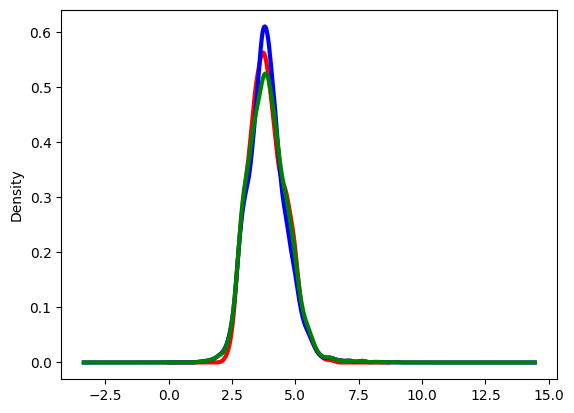

In [45]:
''' this is to compare which one resembles most the original dataset and doesn't add bias '''

df_merged_base['physically unhealthy days'].plot(kind='kde', c='red', linewidth=3);
df_merged_knn_imputed['physically unhealthy days'].plot(kind='kde', c='blue', linewidth=3);
diabetes_mice_imputed['physically unhealthy days'].plot(kind='kde', c='green', linewidth=3);


In [49]:
df_merged_categorical = df_merged_c[['id' , 'fips' , 'state', 'county']]
df_merged_final = pd.merge( df_merged_categorical , df_merged_knn_imputed , how = "inner" , on = "id")
df_merged_final.shape

(18843, 20)

<b> 5.Outlier detection </b>

In [50]:
df_merged_final.shape

(18843, 20)

In [52]:
df_merged_final.head()

,id,fips,state,county,population,household income,year,% insufficient sleep,physically unhealthy days,mentally unhealthy days,% obese,food environment index,% physically inactive,teen birth rate,# medicare enrollees,# some college,% unemployed,income ratio,% single-parent households,# violent crimes
0,0,01001,alabama,autauga,55246.0,51868.0,2015.0,34.959505,5.1,3.6,31.3,7.2,27.9,36.499863,4688.0,8145.0,5.687483,4.171514,29.629370,138.666667
1,1,01003,alabama,baldwin,195540.0,47539.0,2015.0,34.410000,3.3,3.8,25.0,7.6,25.2,44.532662,22883.0,28277.0,5.839547,4.417148,29.242728,406.666667
2,2,01005,alabama,barbour,27076.0,30981.0,2015.0,38.801457,4.8,4.3,38.4,5.0,32.3,72.873800,3088.0,3156.0,10.041503,5.473986,55.824663,39.333333
3,3,01007,alabama,bibb,22512.0,39781.0,2015.0,38.024549,4.7,5.1,37.3,7.6,33.2,50.850851,2022.0,3053.0,6.849776,4.513786,37.176424,54.000000
4,4,01009,alabama,blount,57872.0,44392.0,2015.0,35.004550,5.9,3.9,30.9,8.5,29.8,47.239216,4991.0,7113.0,5.607084,3.983751,27.629884,126.500000


In [53]:
df_summary  = df_merged_final.describe()
df_summary[(df_summary.index == 'min') | (df_summary.index == 'max') ]

,id,population,household income,year,% insufficient sleep,physically unhealthy days,mentally unhealthy days,% obese,food environment index,% physically inactive,teen birth rate,# medicare enrollees,# some college,% unemployed,income ratio,% single-parent households,# violent crimes
min,0.0,86.0,21572.0,2015.0,22.7,1.1,1.0,10.7,0.0,8.1,2.109069,134.0,1.0,0.912113,2.543129,0.0,0.000000
max,18903.0,10170292.0,136191.0,2020.0,47.0,10.0,10.1,57.7,10.0,49.9,127.995643,552565.0,1889562.0,27.653335,11.970639,100.0,46969.333333


In [54]:
''' Population '''

''' Since the minimum and maximum values of population differ a lot let's review the counties that have the largest values '''

df_merged_final[['state' , 'county','population']][df_merged_final['population'] > 1000000].sort_values("population" , ascending=False).drop_duplicates(subset=['state' , 'county']).head()

,state,county,population
6479,california,los angeles,10170292.0
3749,illinois,cook,5246456.0
18324,texas,harris,4698619.0
15804,arizona,maricopa,4410824.0
15923,california,san diego,3343364.0


- above values match with other sources as well: https://www.statista.com/statistics/241702/largest-counties-in-the-us/

In [55]:
''' violent crimes '''

''' diplay more information for the county that has violent crimes over 460000 '''

df_merged_final[df_merged_final['# violent crimes'] > 46000]

,id,fips,state,county,population,household income,year,% insufficient sleep,physically unhealthy days,mentally unhealthy days,% obese,food environment index,% physically inactive,teen birth rate,# medicare enrollees,# some college,% unemployed,income ratio,% single-parent households,# violent crimes
202,202,06037,california,los angeles,10017068.0,54443.0,2015.0,35.315774,3.8,3.7,21.3,7.4,17.0,34.593393,551473.0,1723262.0,9.870682,5.292614,35.567991,46969.333333
3343,3347,06037,california,los angeles,10116705.0,55686.0,2016.0,35.400000,3.9,3.6,21.0,7.8,17.3,32.193109,552565.0,1753773.0,8.259006,5.378365,36.115523,46969.333333


In [56]:
df_merged_final.to_csv("df_merged_final.csv"  , index=False)